In [3]:
#Machine Learning modelling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv('C:\\Users\\Bismark\\Desktop\\Mike_Ansah_assignments\\Sec_Sem\\DataMagement_Assignment_Ease\\kick_data_2016_no_nan.csv',index_col=False)

In [5]:
data.head()

,Unnamed: 0,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged
0,0,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,0.0
1,1,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,220.0
2,2,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,1.0
3,3,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14.0,US,1283.0
4,4,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224.0,US,52375.0


In [6]:
data.shape

(319328, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319328 entries, 0 to 319327
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     319328 non-null  int64  
 1   category       319328 non-null  object 
 2   main_category  319328 non-null  object 
 3   currency       319328 non-null  object 
 4   deadline       319328 non-null  object 
 5   goal           319328 non-null  float64
 6   launched       319328 non-null  object 
 7   pledged        319328 non-null  float64
 8   state          319328 non-null  object 
 9   backers        319328 non-null  float64
 10  country        319328 non-null  object 
 11  usd_pledged    319328 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 29.2+ MB


In [8]:
data.columns

Index(['Unnamed: 0', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged'],
      dtype='object')

In [9]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
data.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged
0,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,0.0
1,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,220.0
2,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,1.0
3,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14.0,US,1283.0
4,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224.0,US,52375.0


In [11]:
#Dropping the category column since it is not needed for the model building
# main_category variable will be used instead
data.drop('category',axis=1,inplace=True)

In [12]:
data.head()

,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged
0,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,0.0
1,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,220.0
2,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,1.0
3,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14.0,US,1283.0
4,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224.0,US,52375.0


In [13]:
# This problem is a classification hence the state variable will be the target
# Listing out its unique values
list(data['state'].unique())

['failed', 'canceled', 'successful', 'live', 'suspended']

In [14]:
# Removing live projects since we can't tell whether they are successful or not
data = data[data['state'] != "live"]

In [15]:
list(data['state'].unique())

['failed', 'canceled', 'successful', 'suspended']

In [16]:
data.shape

(314901, 10)

In [17]:
# Equating all successful projects to 1 and the rest to 0 (unsuccessful)
data = data.assign(Target_state=(data['state'] == 'successful').astype(int))

In [18]:
data.head()

,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,Target_state
0,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,0.0,0
1,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,220.0,0
2,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,1.0,0
3,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14.0,US,1283.0,0
4,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224.0,US,52375.0,1


In [19]:
data_new = data.drop({'state'},axis=1,inplace=True)

In [20]:
data.head()

,main_category,currency,deadline,goal,launched,pledged,backers,country,usd_pledged,Target_state
0,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,0.0,GB,0.0,0
1,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,3.0,US,220.0,0
2,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,1.0,US,1.0,0
3,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,14.0,US,1283.0,0
4,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,224.0,US,52375.0,1


In [21]:
data['deadline']=pd.to_datetime(data['deadline'],format='%Y-%m-%d %H:%M:%S')
data['launched']=pd.to_datetime(data['launched'],format='%Y-%m-%d %H:%M:%S') 

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314901 entries, 0 to 319327
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   main_category  314901 non-null  object        
 1   currency       314901 non-null  object        
 2   deadline       314901 non-null  datetime64[ns]
 3   goal           314901 non-null  float64       
 4   launched       314901 non-null  datetime64[ns]
 5   pledged        314901 non-null  float64       
 6   backers        314901 non-null  float64       
 7   country        314901 non-null  object        
 8   usd_pledged    314901 non-null  float64       
 9   Target_state   314901 non-null  int32         
dtypes: datetime64[ns](2), float64(4), int32(1), object(3)
memory usage: 25.2+ MB


In [23]:
# Breaking down the date variable deadline
data["deadline_year"] = data.deadline.dt.year 

In [24]:
data["deadline_month"] = data.deadline.dt.month
data["deadline_day"] = data.deadline.dt.day
data["deadline_hour"] = data.deadline.dt.hour
data["deadline_min"] = data.deadline.dt.minute
data["deadline_sec"] = data.deadline.dt.second 

In [25]:
# Breaking down the date variable launched
data["launched_year"] = data.launched.dt.year
data["launched_month"] = data.launched.dt.month
data["launched_day"] = data.launched.dt.day
data["launched_hour"] = data.launched.dt.hour
data["launched_min"] = data.launched.dt.minute
data["launched_sec"] = data.launched.dt.second 

In [26]:
data.head()

,main_category,currency,deadline,goal,launched,pledged,backers,country,usd_pledged,Target_state,...,deadline_day,deadline_hour,deadline_min,deadline_sec,launched_year,launched_month,launched_day,launched_hour,launched_min,launched_sec
0,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,0.0,GB,0.0,0,...,9,11,36,0,2015,8,11,12,12,28
1,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,3.0,US,220.0,0,...,26,0,20,50,2013,1,12,0,20,50
2,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,1.0,US,1.0,0,...,16,4,24,11,2012,3,17,3,24,11
3,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,14.0,US,1283.0,0,...,29,1,0,0,2015,7,4,8,35,3
4,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,224.0,US,52375.0,1,...,1,13,38,27,2016,2,26,13,38,27


In [27]:
data.drop({'deadline','launched'},axis=1,inplace=True)

In [28]:
data.head()

,main_category,currency,goal,pledged,backers,country,usd_pledged,Target_state,deadline_year,deadline_month,deadline_day,deadline_hour,deadline_min,deadline_sec,launched_year,launched_month,launched_day,launched_hour,launched_min,launched_sec
0,Publishing,GBP,1000.0,0.0,0.0,GB,0.0,0,2015,10,9,11,36,0,2015,8,11,12,12,28
1,Film & Video,USD,45000.0,220.0,3.0,US,220.0,0,2013,2,26,0,20,50,2013,1,12,0,20,50
2,Music,USD,5000.0,1.0,1.0,US,1.0,0,2012,4,16,4,24,11,2012,3,17,3,24,11
3,Film & Video,USD,19500.0,1283.0,14.0,US,1283.0,0,2015,8,29,1,0,0,2015,7,4,8,35,3
4,Food,USD,50000.0,52375.0,224.0,US,52375.0,1,2016,4,1,13,38,27,2016,2,26,13,38,27


In [ ]:
data.to_csv('C:\\Users\\Bismark\\Desktop\\Mike_Ansah_assignments\\Sec_Sem\\DataMagement_Assignment_Ease\\kick_model_data.csv', index=False)

In [29]:
# Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder

Encoded_variables = data[['main_category','currency','country']].apply(LabelEncoder().fit_transform)

In [30]:
Encoded_variables

,main_category,currency,country
0,12,5,9
1,6,12,20
2,10,12,20
3,6,12,20
4,7,12,20
...,...,...,...
319323,6,12,20
319324,6,12,20
319325,6,12,20
319326,13,12,20


In [31]:
data.drop({'main_category','currency','country'},axis=1,inplace=True)

In [32]:
data.head()

,goal,pledged,backers,usd_pledged,Target_state,deadline_year,deadline_month,deadline_day,deadline_hour,deadline_min,deadline_sec,launched_year,launched_month,launched_day,launched_hour,launched_min,launched_sec
0,1000.0,0.0,0.0,0.0,0,2015,10,9,11,36,0,2015,8,11,12,12,28
1,45000.0,220.0,3.0,220.0,0,2013,2,26,0,20,50,2013,1,12,0,20,50
2,5000.0,1.0,1.0,1.0,0,2012,4,16,4,24,11,2012,3,17,3,24,11
3,19500.0,1283.0,14.0,1283.0,0,2015,8,29,1,0,0,2015,7,4,8,35,3
4,50000.0,52375.0,224.0,52375.0,1,2016,4,1,13,38,27,2016,2,26,13,38,27


In [33]:
data = data.join(Encoded_variables)

In [34]:
data.head()

,goal,pledged,backers,usd_pledged,Target_state,deadline_year,deadline_month,deadline_day,deadline_hour,deadline_min,deadline_sec,launched_year,launched_month,launched_day,launched_hour,launched_min,launched_sec,main_category,currency,country
0,1000.0,0.0,0.0,0.0,0,2015,10,9,11,36,0,2015,8,11,12,12,28,12,5,9
1,45000.0,220.0,3.0,220.0,0,2013,2,26,0,20,50,2013,1,12,0,20,50,6,12,20
2,5000.0,1.0,1.0,1.0,0,2012,4,16,4,24,11,2012,3,17,3,24,11,10,12,20
3,19500.0,1283.0,14.0,1283.0,0,2015,8,29,1,0,0,2015,7,4,8,35,3,6,12,20
4,50000.0,52375.0,224.0,52375.0,1,2016,4,1,13,38,27,2016,2,26,13,38,27,7,12,20


In [35]:
# From EDA we found out pledged and usd_pledged contain almost similar information due correlation being >80
# Removing usd-pledged column before modeling
data.drop('usd_pledged',axis=1, inplace=True)

In [36]:
data.columns

Index(['goal', 'pledged', 'backers', 'Target_state', 'deadline_year',
       'deadline_month', 'deadline_day', 'deadline_hour', 'deadline_min',
       'deadline_sec', 'launched_year', 'launched_month', 'launched_day',
       'launched_hour', 'launched_min', 'launched_sec', 'main_category',
       'currency', 'country'],
      dtype='object')

In [37]:
data.head()

,goal,pledged,backers,Target_state,deadline_year,deadline_month,deadline_day,deadline_hour,deadline_min,deadline_sec,launched_year,launched_month,launched_day,launched_hour,launched_min,launched_sec,main_category,currency,country
0,1000.0,0.0,0.0,0,2015,10,9,11,36,0,2015,8,11,12,12,28,12,5,9
1,45000.0,220.0,3.0,0,2013,2,26,0,20,50,2013,1,12,0,20,50,6,12,20
2,5000.0,1.0,1.0,0,2012,4,16,4,24,11,2012,3,17,3,24,11,10,12,20
3,19500.0,1283.0,14.0,0,2015,8,29,1,0,0,2015,7,4,8,35,3,6,12,20
4,50000.0,52375.0,224.0,1,2016,4,1,13,38,27,2016,2,26,13,38,27,7,12,20


In [ ]:
data.to_csv('C:\\Users\\Bismark\\Desktop\\Mike_Ansah_assignments\\Sec_Sem\\DataMagement_Assignment_Ease\\kick_model_data_final_all_num.csv', index=False)

In [38]:
# Splitting the target from the other variables

data_X = data.drop('Target_state', axis =1)

data_y= data.Target_state

In [39]:
data_X.head()

,goal,pledged,backers,deadline_year,deadline_month,deadline_day,deadline_hour,deadline_min,deadline_sec,launched_year,launched_month,launched_day,launched_hour,launched_min,launched_sec,main_category,currency,country
0,1000.0,0.0,0.0,2015,10,9,11,36,0,2015,8,11,12,12,28,12,5,9
1,45000.0,220.0,3.0,2013,2,26,0,20,50,2013,1,12,0,20,50,6,12,20
2,5000.0,1.0,1.0,2012,4,16,4,24,11,2012,3,17,3,24,11,10,12,20
3,19500.0,1283.0,14.0,2015,8,29,1,0,0,2015,7,4,8,35,3,6,12,20
4,50000.0,52375.0,224.0,2016,4,1,13,38,27,2016,2,26,13,38,27,7,12,20


In [40]:
data.shape

(314901, 19)

In [41]:
data_X.shape

(314901, 18)

In [42]:
#Using the three way hold out method
#Splitting the data into train, validation and test 

from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(data_X, data_y, train_size=0.7, random_state=1)

#Where X_train is the training data


In [43]:
X_train.shape

(220430, 18)

In [44]:
y_train.shape

(220430,)

In [45]:
X_rem.shape

(94471, 18)

In [46]:
y_rem.shape

(94471,)

In [47]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state = 1) 

In [48]:
X_valid.shape

(47235, 18)

In [ ]:
save_train_data = pd.concat([X_train,y_train],axis=1)

In [ ]:
save_validation_data = pd.concat([X_valid,y_valid],axis=1)

In [ ]:
save_test_data = pd.concat([X_test,y_test],axis=1)

In [ ]:
save_train_data.to_csv('C:\\Users\\Bismark\\Desktop\\Mike_Ansah_assignments\\Sec_Sem\\DataMagement_Assignment_Ease\\training.csv', index=False)

In [ ]:
save_validation_data.to_csv('C:\\Users\\Bismark\\Desktop\\Mike_Ansah_assignments\\Sec_Sem\\DataMagement_Assignment_Ease\\validation_data.csv', index=False)

In [ ]:
save_test_data.to_csv('C:\\Users\\Bismark\\Desktop\\Mike_Ansah_assignments\\Sec_Sem\\DataMagement_Assignment_Ease\\test_data.csv', index=False)

In [ ]:
#Preparing the training data
# Scaling the data
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range=(0, 1))

#rescaled_X_train = scaler.fit_transform(X_train)

In [ ]:
#print(rescaled_X_train[0:2,:])

In [49]:
# Scaling the validation data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler


#scaler = MinMaxScaler().fit(X_valid)
#rescaled_X_valid = scaler.transform(X_valid) 

scaler = StandardScaler().fit(X_valid)
rescaled_X_valid = scaler.transform(X_valid)

#scaler = Normalizer().fit(X_valid)
#rescaled_X_valid  = scaler.transform(X_valid)

In [50]:
print(rescaled_X_valid[0:2,:])

[[-0.04305825 -0.13647219 -0.1214754   0.71212304 -1.76064103 -1.13333683
  -1.02830165  0.24088546  1.5934139   0.15180468  1.7280348  -1.05611074
  -1.15570168  0.19389372  1.35830279 -0.39886329  0.46317578  0.45455676]
 [-0.04329606 -0.09433961  0.0422394   0.71212304  0.38519133 -0.57902671
   0.49963486  0.92888441  0.63189319  0.74313687  0.19347737 -0.48598938
   0.37963954  0.97621417  0.25769958  1.39677096 -3.06185571 -3.13098663]]


c:\users\bismark\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\bismark\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

LR: 84.121961 (0.005419)
LDA: 66.831765 (0.005736)
KNN: 64.380226 (0.008592)
RF: 98.670471 (0.002421)
NB: 74.353760 (0.006227)
SVM: 78.674711 (0.004176)


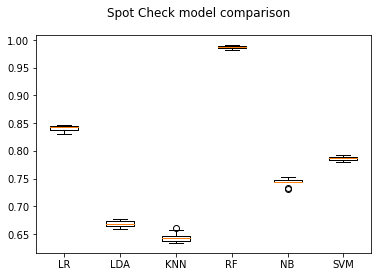

In [52]:
# Spot check using two linear models and four non-linear models with KFold cross validation
# Linear models are Logistic regression and Linear Discriminant Analysis
# Non linear models to be used are kNN, NB , RF and SVM

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

num_folds = 10
seed = 1

#kfold = KFold(n_splits=num_folds, random_state=seed, shuffle =True)

#model = LogisticRegression()
#model = LinearDiscriminantAnalysis()
#model = KNeighborsClassifier()
#model = GaussianNB()
#model = SVC()
#model = RandomForestClassifier()
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#results = cross_val_score(model,rescaled_X_valid, y_valid, cv=kfold)
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle =True)
    cv_results = cross_val_score(model, rescaled_X_valid, y_valid, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100.0, cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Spot Check model comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#print(results.mean()*100.0, results.std())

In [53]:
# Random Forest emerged as the best possible model for this classification 
# Using the training data to develop the final model

import pickle

scaler_train = StandardScaler().fit(X_train)
rescaled_X_train = scaler_train.transform(X_train)

scaler_test = StandardScaler().fit(X_test)
rescaled_X_test = scaler.transform(X_test)



In [ ]:
print(rescaled_X_train[0:2,:])

In [ ]:
print(rescaled_X_test[0:2,:])

In [54]:
model = RandomForestClassifier()

model.fit(rescaled_X_train, y_train)

result = model.score(rescaled_X_test, y_test)
print(result * 100)

result_train = model.score(rescaled_X_train, y_train)
print(result_train * 100)

#filename = 'final_kick_model.sav'
#pickle.dump(model, open(filename, 'wb'))

94.84926750783302
100.0


In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

yhat_probs = model.predict(rescaled_X_test)

accuracy = accuracy_score(y_test, yhat_probs)
print('Accuracy: %f' % (accuracy*100))

precision = precision_score(y_test, yhat_probs)
print('Precision: %f' % (precision*100))
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_probs)
print('Recall: %f' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_probs)
print('F1 score: %f' % (f1*100))
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % (auc*100))

Accuracy: 94.849268
Precision: 93.923454
Recall: 91.581181
F1 score: 92.737530
ROC AUC: 94.130751


In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

test_row = [[2.49900002e-05,5.42734314e-04,5.37502483e-04,7.50000000e-01,7.27272727e-01,3.00000000e-01,4.34782609e-02,5.42372881e-01,6.27118644e-01, 8.57142857e-01,
             6.36363636e-01, 3.33333333e-01,4.34782609e-02,5.42372881e-01,6.27118644e-01,7.14285714e-01,1.00000000e+00,1.00000000e+00]]

yhat = loaded_model.predict(test_row)

print('Predicted Class: %d' % yhat[0])